# Análise da diferença de imagens

### Neste exercício utilizaremos o conjunto de dados da FEI + duas fotos inéditas
- Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip
- Descompacte o conjunto e dados no mesmo diretório deste arquivo
- Copie as duas imagens inéditas para o mesmo diretório deste arquivo

##### Passo 1: Importar as bibliotecas necessárias

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

##### Passo 2: Importar o conjunto de dados da FEI

In [22]:
# Criando uma variável para armazenar as imagens
dataset = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*.jpg"):
    # Carredando a imagem do índice
    load_file = Image.open(file)
    # Convertendo a imagem e tons de cinza
    load_file = load_file.convert("L")
    # Convertendo o objeto imagem em array
    load_file = np.array(load_file)
    # Adicionando a array da na variável dataset
    dataset.append(load_file)
# Convertendo a lista de imagens em array
dataset = np.array(dataset)

In [23]:
# Dimensão do conjunto de dados
dataset.shape

(200, 360, 260)

##### Passo 3: Importar as duas fotos inéditas

In [24]:
foto_neutral = np.array(Image.open('minha_foto_a.jpg').convert('L'))
foto_sorrindo = np.array(Image.open('minha_foto_b.jpg').convert('L'))

(np.float64(-0.5), np.float64(259.5), np.float64(359.5), np.float64(-0.5))

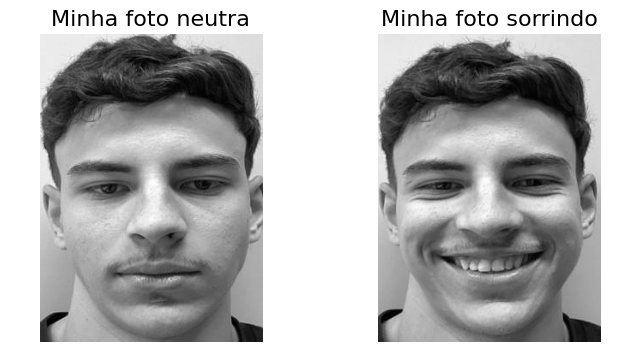

In [25]:
plt.subplots(figsize = (8,4))
plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(foto_neutral, cmap = 'gray')
plt.title('Minha foto neutra', fontsize=16)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(foto_sorrindo, cmap = 'gray')
plt.title('Minha foto sorrindo', fontsize=16)
plt.axis('off')

##### Passo 4: Calcular a diferença das fotos inéditas em relação ao conjunto de dados da FEI

In [26]:
indice = dataset.shape[0]

dif_neutral = np.zeros([indice])
dif_smiling = np.zeros([indice])

for img in range(indice):
    dif_neutral[img] = np.sum(abs(dataset[img,:,:]-foto_neutral))
    dif_smiling[img] = np.sum(abs(dataset[img,:,:]-foto_sorrindo))
    

In [27]:
df_dif_neutral = pd.DataFrame(dif_neutral, columns = ['Diferença'])
df_dif_neutral

,Diferença
0,14595609.0
1,14628616.0
2,16172383.0
3,15920007.0
4,14724792.0
...,...
195,14019835.0
196,13549066.0
197,13461986.0
198,17126091.0


In [28]:
df_dif_smiling = pd.DataFrame(dif_smiling, columns = ['Diferença']).head(5)
df_dif_smiling

,Diferença
0,14430927.0
1,14798526.0
2,16016917.0
3,16261693.0
4,14209390.0


In [29]:
s_dif_neutral = df_dif_neutral.sort_values(by = 'Diferença').head(5)
s_dif_neutral

,Diferença
61,13037694.0
60,13090778.0
197,13461986.0
196,13549066.0
165,13899144.0


In [30]:
id_neutral = list(s_dif_neutral.index)
id_neutral

[61, 60, 197, 196, 165]

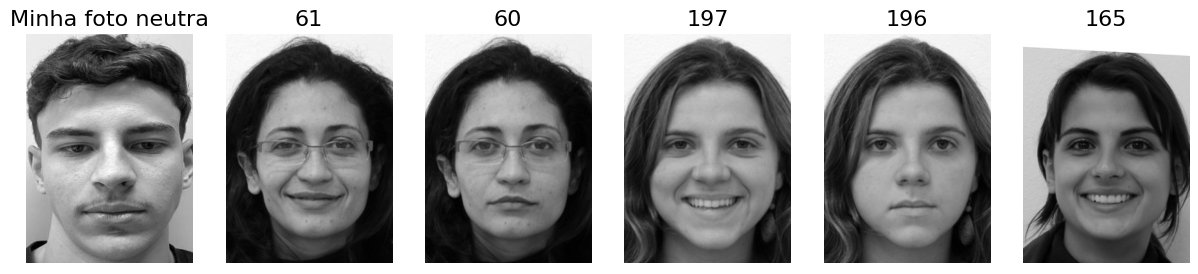

In [31]:
plt.subplots(figsize = (15,3))
plt.axis('off')
plt.subplot(1,len(id_neutral)+1,1)
plt.imshow(foto_neutral, cmap = 'gray')
plt.title('Minha foto neutra', fontsize=16)
plt.axis('off')
position = 2
for id_img in id_neutral:
    plt.subplot(1,len(id_neutral)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap = 'gray')
    plt.title(id_img, fontsize=16)
    plt.axis('off')

plt.show()

In [33]:
s_dif_neutral_r = df_dif_neutral.sort_values(by = 'Diferença', ascending = False).head(5)
id_neutral_r = list(s_dif_neutral_r.index)
id_neutral_r

[198, 199, 56, 98, 99]

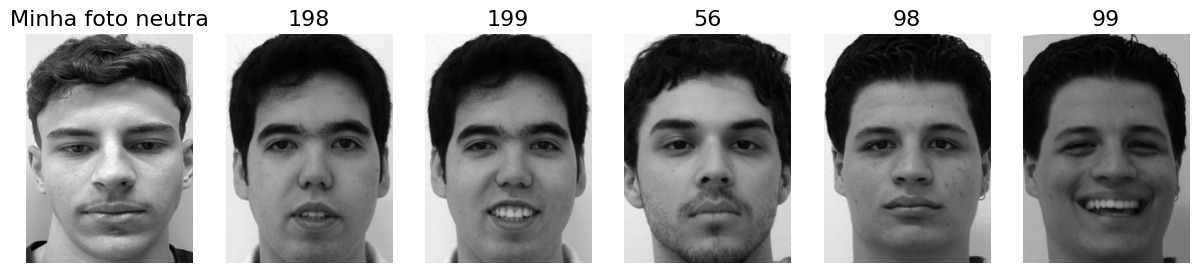

In [34]:
plt.subplots(figsize = (15,3))
plt.axis('off')
plt.subplot(1,len(id_neutral_r)+1,1)
plt.imshow(foto_neutral, cmap = 'gray')
plt.title('Minha foto neutra', fontsize=16)
plt.axis('off')
position = 2
for id_img in id_neutral_r:
    plt.subplot(1,len(id_neutral_r)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap = 'gray')
    plt.title(id_img, fontsize=16)
    plt.axis('off')

plt.show()

#### Repetindo o processo para foto sorrindo...

In [35]:
s_dif_smiling = df_dif_smiling.sort_values(by = 'Diferença').head(5)
id_smiling = list(s_dif_smiling.index)
id_smiling

[4, 0, 1, 2, 3]

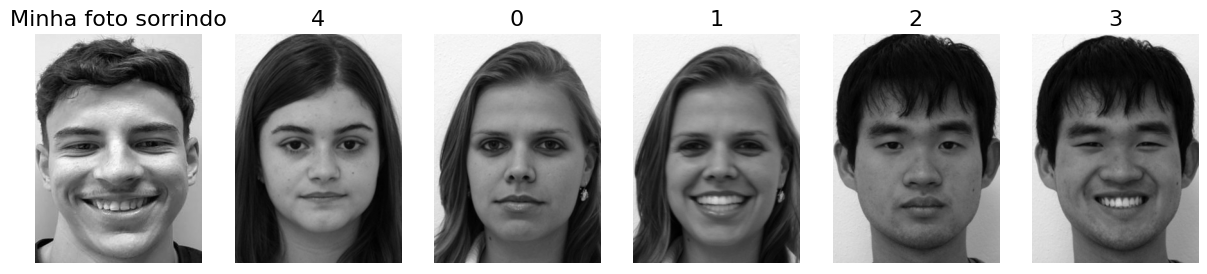

In [36]:
plt.subplots(figsize = (15,3))
plt.axis('off')
plt.subplot(1,len(id_smiling)+1,1)
plt.imshow(foto_sorrindo, cmap = 'gray')
plt.title('Minha foto sorrindo', fontsize=16)
plt.axis('off')
position = 2
for id_img in id_smiling:
    plt.subplot(1,len(id_smiling)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap = 'gray')
    plt.title(id_img, fontsize=16)
    plt.axis('off')

plt.show()

In [37]:
s_dif_smiling_r = s_dif_smiling.sort_values(by = 'Diferença', ascending = False).head(5)
id_smiling_r = list(s_dif_smiling_r.index)
id_smiling_r

[3, 2, 1, 0, 4]

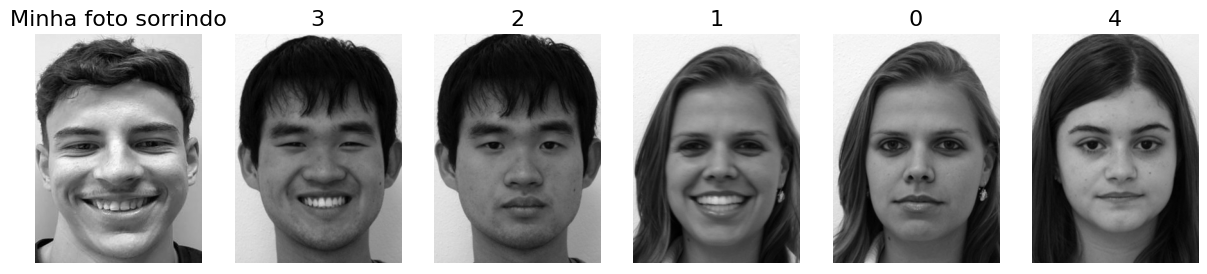

In [38]:
plt.subplots(figsize = (15,3))
plt.axis('off')
plt.subplot(1,len(id_smiling_r)+1,1)
plt.imshow(foto_sorrindo, cmap = 'gray')
plt.title('Minha foto sorrindo', fontsize=16)
plt.axis('off')
position = 2
for id_img in id_smiling_r:
    plt.subplot(1,len(id_smiling_r)+1,position)
    position += 1
    plt.imshow(dataset[id_img,:,:], cmap = 'gray')
    plt.title(id_img, fontsize=16)
    plt.axis('off')

plt.show()